<a href="https://colab.research.google.com/github/srirams1983/PyImageSearch-CV-DL-CrashCourse/blob/master/01-deep-learning-face-detection/my_face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!rm 'rooster.jpg'

In [33]:
from google.colab import files
uploaded = files.upload()

Saving iron_chic.jpg to iron_chic.jpg


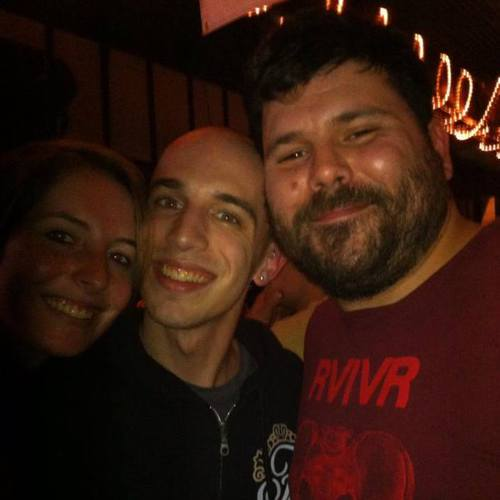

In [34]:
from IPython.display import Image
Image('rooster.jpg',width=100,height=100)
Image('iron_chic.jpg',width=100,height=100)

In [19]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel


--2021-06-26 01:59:14--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2021-06-26 01:59:14 (71.4 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2021-06-26 01:59:14--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

In [38]:
from imutils import paths
imagePaths = list(paths.list_images('/content/PyImageSearch-CV-DL-CrashCourse/01-deep-learning-face-detection'))
print(imagePaths)

['/content/PyImageSearch-CV-DL-CrashCourse/01-deep-learning-face-detection/photo.jpg', '/content/PyImageSearch-CV-DL-CrashCourse/01-deep-learning-face-detection/iron_chic.jpg', '/content/PyImageSearch-CV-DL-CrashCourse/01-deep-learning-face-detection/rooster.jpg', '/content/PyImageSearch-CV-DL-CrashCourse/01-deep-learning-face-detection/images/iron_chic.jpg', '/content/PyImageSearch-CV-DL-CrashCourse/01-deep-learning-face-detection/images/rooster.jpg']


['',
 'content',
 'PyImageSearch-CV-DL-CrashCourse',
 '01-deep-learning-face-detection',
 'photo.jpg']

(480, 640, 3)

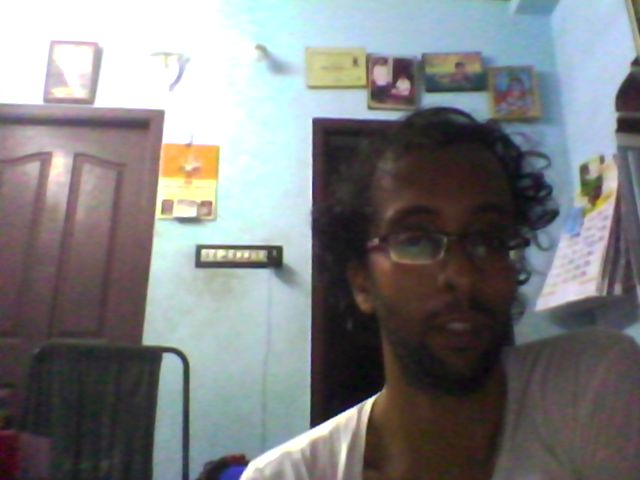

['',
 'content',
 'PyImageSearch-CV-DL-CrashCourse',
 '01-deep-learning-face-detection',
 'iron_chic.jpg']

(500, 500, 3)

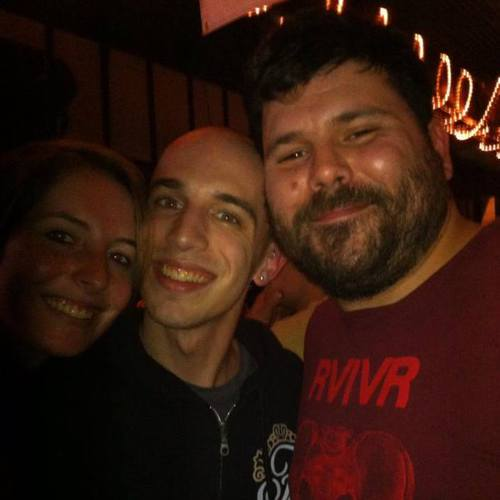

['',
 'content',
 'PyImageSearch-CV-DL-CrashCourse',
 '01-deep-learning-face-detection',
 'rooster.jpg']

(499, 500, 3)

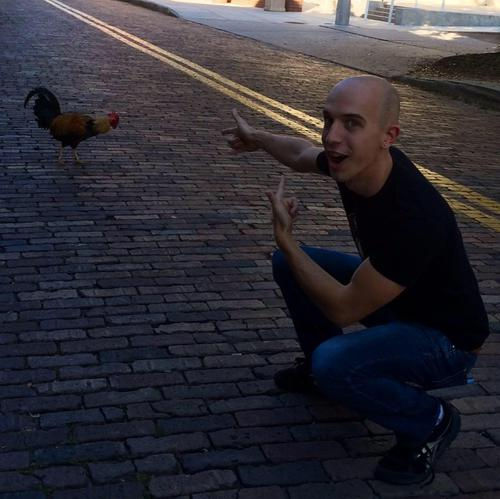

['',
 'content',
 'PyImageSearch-CV-DL-CrashCourse',
 '01-deep-learning-face-detection',
 'images',
 'iron_chic.jpg']

(500, 500, 3)

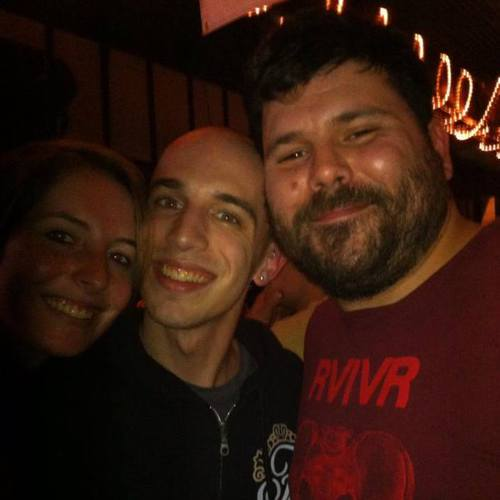

['',
 'content',
 'PyImageSearch-CV-DL-CrashCourse',
 '01-deep-learning-face-detection',
 'images',
 'rooster.jpg']

(499, 500, 3)

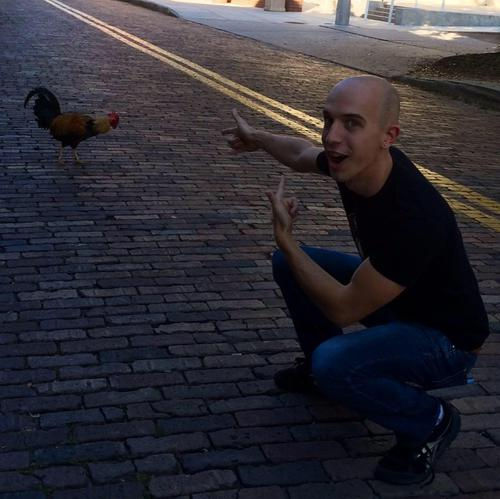

In [45]:
for (i, imagePath) in enumerate(imagePaths):
    # extract the person name from the image path
    name = imagePath.split(os.path.sep)
    display(name)
    # load the input image and convert it from BGR (OpenCV ordering)
    # to dlib ordering (RGB)
    image = cv2.imread(imagePath)
    display(image.shape)
    cv2_imshow(image)

In [46]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
image_fl = 'rooster.jpg'
image_fl2 = 'iron_chic.jpg'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


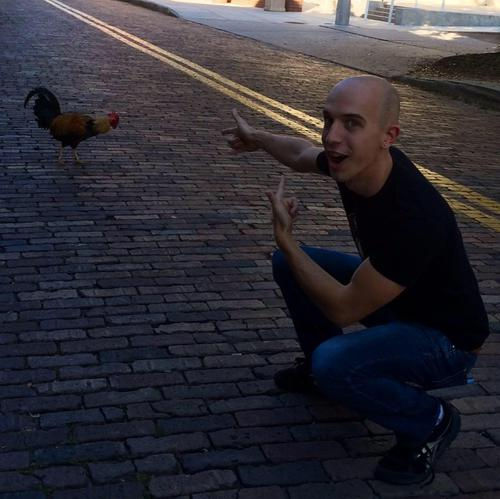

(499, 500, 3)

[INFO] computing object detections...


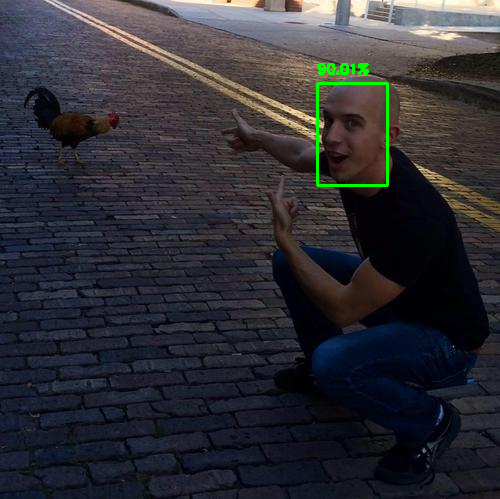

-1

In [47]:
# USAGE
# python detect_faces.py --image rooster.jpg --prototxt deploy.prototxt.txt --model res10_300x300_ssd_iter_140000.caffemodel

# import the necessary packages
import os
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

# construct the argument parse and parse the arguments
'''ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
ap.add_argument("-p", "--prototxt", required=True,
	help="path to Caffe 'deploy' prototxt file")
ap.add_argument("-m", "--model", required=True,
	help="path to Caffe pre-trained model")
ap.add_argument("-c", "--confidence", type=float, default=0.5,
	help="minimum probability to filter weak detections")
args = vars(ap.parse_args())
'''
# get args and concatenate with current directory
# get current directory
#dirname, filename = os.path.split(os.path.abspath(__file__))
#prototxt = os.path.join(dirname, args["prototxt"])
#model = os.path.join(dirname, args["model"])
#image = os.path.join(dirname, args["image"])
'''
dirname = '/content/PyImageSearch-CV-DL-CrashCourse/01-deep-learning-face-detection'
filename = ''
prototxt = '/content/PyImageSearch-CV-DL-CrashCourse/01-deep-learning-face-detection/model/deploy.prototxt.txt'
model = '/content/PyImageSearch-CV-DL-CrashCourse/01-deep-learning-face-detection/model/res10_300x300_ssd_iter_140000.caffemodel'
image_fl = '/content/PyImageSearch-CV-DL-CrashCourse/01-deep-learning-face-detection/images/rooster.jpg'
# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(prototxt, model)
'''


# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
image = cv2.imread(image_fl)
cv2_imshow(image)
display(image.shape)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, 
	(300, 300), (104.0, 177.0, 123.0))

# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

# loop over the detections
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence
	if confidence >= 0.6:
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
 
		# draw the bounding box of the face along with the associated
		# probability
		text = f"{(confidence * 100):.2f}%"
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY),
			(0, 255, 0), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

# show the output image

cv2_imshow(image)
cv2.waitKey(0)

In [7]:
import os
from imutils.video import VideoStream
import numpy as np
import argparse
import imutils
import time
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [8]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [17]:
image_file = take_photo()

<IPython.core.display.Javascript object>

400 300


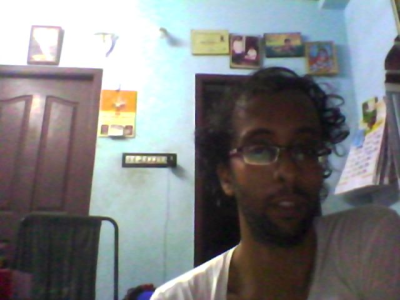

In [18]:
#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread(image_file)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

In [12]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


In [13]:
# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

In [14]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [15]:
for i in range(0, detections.shape[2]):

	# extract the confidence (i.e., probability) associated with the prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence threshold
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# draw the bounding box of the face along with the associated probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

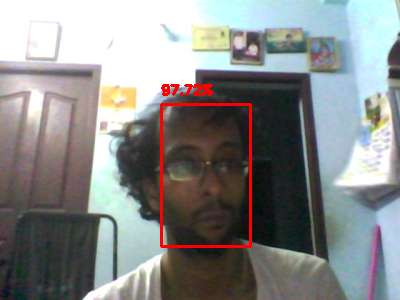

In [16]:
cv2_imshow(image)